<a href="https://colab.research.google.com/github/Mosaraf15/Data-Visualization-ML/blob/main/04_Data_Visualization_Histogram%2C_Distribution%2C_ECDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Visualization: Histogram, Distribution, ECDF
#####**Md.Mosaraf Hossain Khan**
Chittagang, Bangladesh

#### **Objectives:**
- Histogram
- Distribution
- ecdf (empirical cumulative distribution function)

Instructor: 

**Md Shahidullah Kawsar**
<br>Data Scientist, IDARE, Houston, TX, USA


#### References:
<br>[1] https://seaborn.pydata.org/generated/seaborn.histplot.html
<br>[2] The Main Ideas behind Probability Distributions: https://www.youtube.com/watch?v=oI3hZJqXJuc&ab_channel=StatQuestwithJoshStarmer
<br>[3] StatQuest: Histograms, Clearly Explained: https://www.youtube.com/watch?v=qBigTkBLU6g&ab_channel=StatQuestwithJoshStarmer
<br>[4] The Normal Distribution, Clearly Explained!!!: https://www.youtube.com/watch?v=rzFX5NWojp0&list=RDCMUCtYLUTtgS3k1Fg4y5tAhLbw&index=4&ab_channel=StatQuestwithJoshStarmer
<br>[5] The Central Limit Theorem, Clearly Explained!!!: https://www.youtube.com/watch?v=YAlJCEDH2uY&ab_channel=StatQuestwithJoshStarmer
<br>[6] https://statquest.org/

### What is customer churn?
Source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

When an existing customer, user, player, subscriber or any kind of return client stops doing business or ends the relationship with a company is called customer churn.

**Contractual churn:** When a customer is under contract for a service and decides to cancel their service. Example: Cable TV, SaaS products (Software as a Service e.g. Dropbox).

**Voluntary churn:** When a user voluntarily cancels a service and includes prepaid cell phones, streaming subscriptions.

**Non-contractual churn:** When a customer is not under contract for a service and includes customer loyality at a retail location or online browsing. 

**Involuntary churn:** When a churn occurs not at the request of the customer. For example: credit card expiration, utilities being shut off by the provider.

Most likely, you as a customer have cancelled a service for a variety of reasons including lack of usage, poor service or better price. 

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# required library for data analysis
import pandas as pd
import numpy as np

# required librairies for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
#sns.set_context('paper')
#sns.set_context('poster')
#...................

Dataset: cellular usage dataset that consists of records of actual cell phone that include specific features such as

1. **Account_Length**: the number of days the customer has the subscription with the telecom company

2. **Vmail_Message**: the total number of voicemails the customer has sent

3. **Total_mins**: the total number of minutes the customer has talked over the phone

4. **CustServ_Calls**: the number of customer service calls the customer made

5. **Churn**: yes and no - indicating whether or not the customer has churned

6. **Intl_Plan**: yes and no - indicating whether or not the customer has international plan or not

7. **Vmail_Plan**: yes and no - indicating whether or not the customer has voicemail plan or not

8. **Total_calls**: the total number of calls the customer has made

9. **Total_charges**: the total amount of bill in $ the customer has paid

In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Python/02 Python Data Visualization/Data_Visualization_with_Python_s2-main/telecom_data.csv")

display(df.head(7))

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Total_mins,Total_calls,Total_charges
0,128,25,1,no,no,yes,717.2,303,320.26
1,107,26,1,no,no,yes,625.2,332,313.64
2,137,0,0,no,no,no,539.4,333,224.89
3,84,0,2,no,yes,no,564.8,255,263.70
4,75,0,3,no,yes,no,512.0,359,238.99
5,118,0,0,no,yes,no,654.2,323,271.51
6,121,24,3,no,no,yes,786.8,321,290.91


In [6]:
display(df.head(8).T)

,0,1,2,3,4,5,6,7
Account_Length,128,107,137,84,75,118,121,147
Vmail_Message,25,26,0,0,0,0,24,0
CustServ_Calls,1,1,0,2,3,0,3,0
Churn,no,no,no,no,no,no,no,no
Intl_Plan,no,no,no,yes,yes,yes,no,yes
Vmail_Plan,yes,yes,no,no,no,no,yes,no
Total_mins,717.2,625.2,539.4,564.8,512.0,654.2,786.8,479.0
Total_calls,303,332,333,255,359,323,321,275
Total_charges,320.26,313.64,224.89,263.7,238.99,271.51,290.91,258.7


In [7]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   CustServ_Calls  3333 non-null   int64  
 3   Churn           3333 non-null   object 
 4   Intl_Plan       3333 non-null   object 
 5   Vmail_Plan      3333 non-null   object 
 6   Total_mins      3333 non-null   float64
 7   Total_calls     3333 non-null   int64  
 8   Total_charges   3333 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 234.5+ KB
None


In [8]:
print(df.shape)

(3333, 9)


In [ ]:
display(df.describe(include=['O']))

In [ ]:
df["Intl_Plan"].value_counts()

no     3010
yes     323
Name: Intl_Plan, dtype: int64

# Histogram using Seaborn

In [9]:
display(df.describe())

,Account_Length,Vmail_Message,CustServ_Calls,Total_mins,Total_calls,Total_charges
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,1.562856,591.864776,305.137114,260.321791
std,39.822106,13.688365,1.315491,89.954251,34.448164,53.810896
min,1.000000,0.000000,0.000000,284.300000,191.000000,68.370000
25%,74.000000,0.000000,1.000000,531.500000,282.000000,224.220000
50%,101.000000,0.000000,1.000000,593.600000,305.000000,260.560000
75%,127.000000,20.000000,2.000000,652.400000,328.000000,295.410000
max,243.000000,51.000000,9.000000,885.000000,416.000000,460.630000


In [17]:
display(df.describe(include=['O']))

,Churn,Intl_Plan,Vmail_Plan
count,3333,3333,3333
unique,2,2,2
top,no,no,no
freq,2850,3010,2411


In [18]:
df["Intl_Plan"].value_counts()

no     3010
yes     323
Name: Intl_Plan, dtype: int64

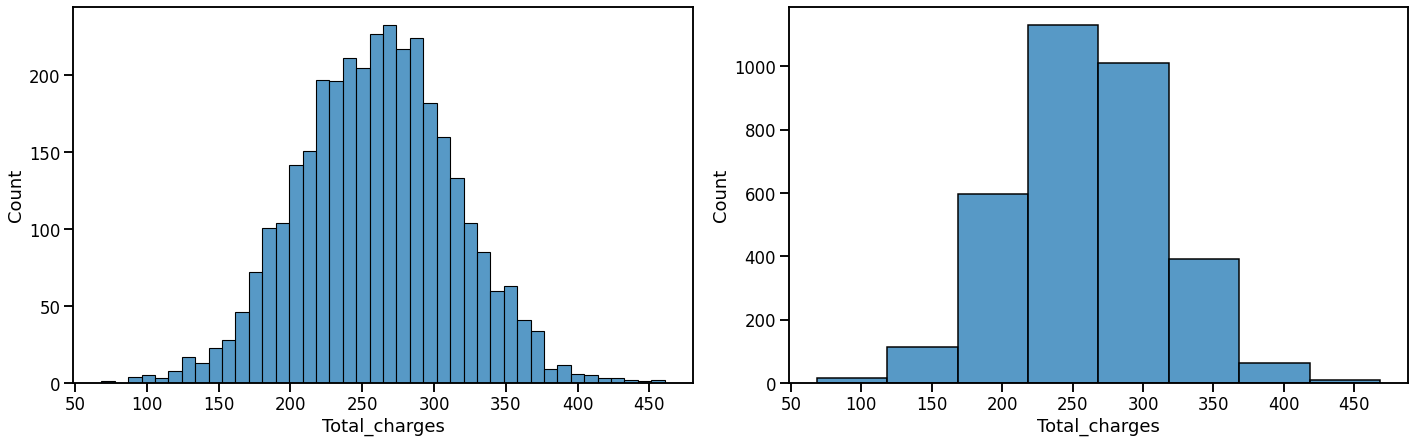

In [10]:
plt.figure(figsize=(20,12))

plt.subplot(2,2,1)
sns.histplot(x="Total_charges", data=df)

plt.subplot(2,2,2)
sns.histplot(x="Total_charges", data=df, binwidth=50)

plt.tight_layout()
plt.show()

In [11]:
np.arange(df["Total_charges"].min(), df["Total_charges"].max()+51, 50)  #range per bar

array([ 68.37, 118.37, 168.37, 218.37, 268.37, 318.37, 368.37, 418.37,
       468.37])

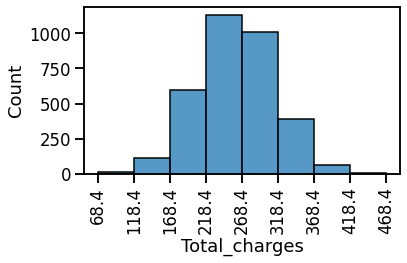

In [12]:
sns.histplot(x="Total_charges", data=df, binwidth=50)
plt.xticks(np.arange(df["Total_charges"].min(), df["Total_charges"].max()+51, 50), rotation=90)

plt.tight_layout()
plt.show()

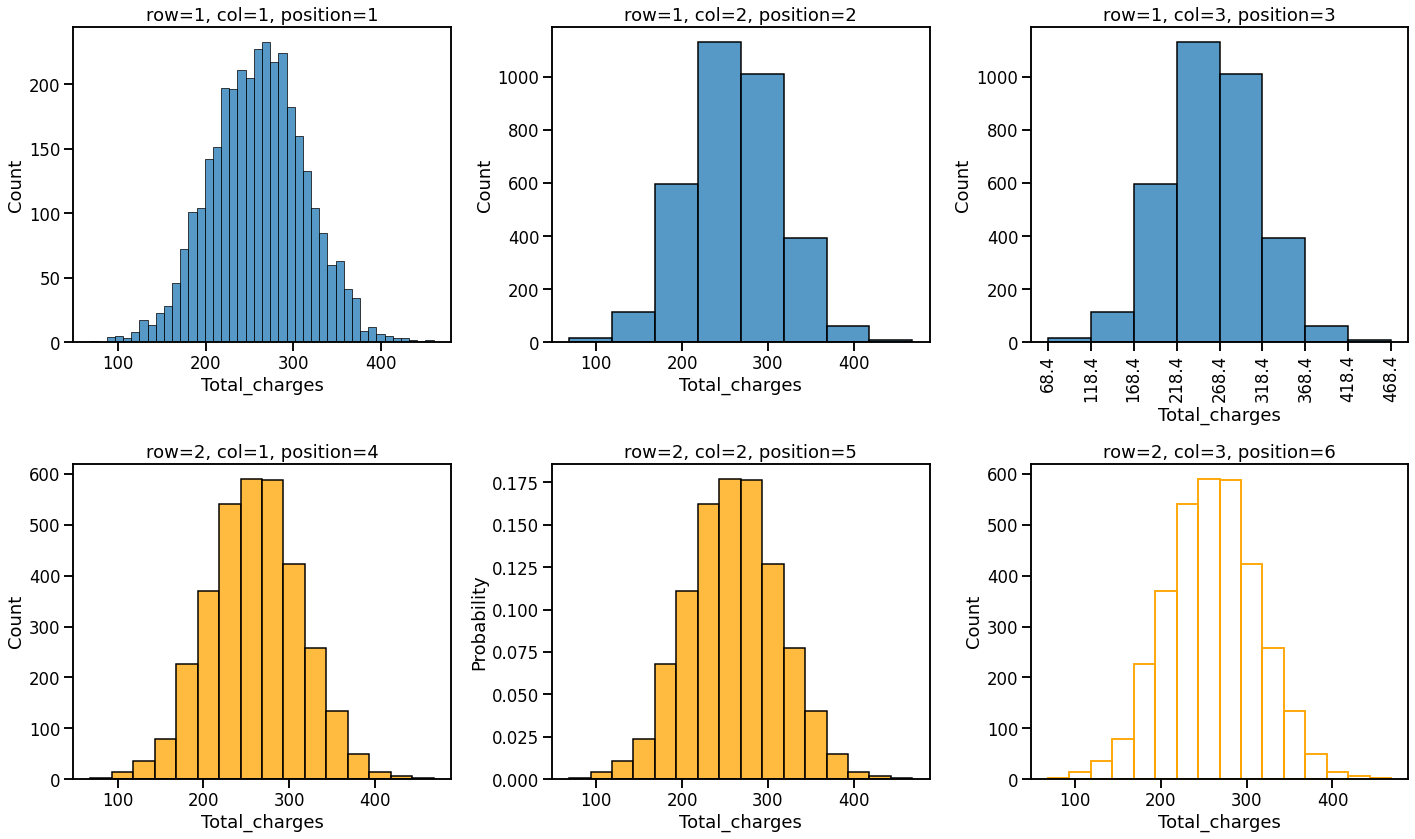

In [13]:
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.histplot(x="Total_charges", data=df)
plt.title("row=1, col=1, position=1")

plt.subplot(2,3,2)
sns.histplot(x="Total_charges", data=df, binwidth=50)
plt.title("row=1, col=2, position=2")

plt.subplot(2,3,3)
sns.histplot(x="Total_charges", data=df, binwidth=50)
plt.xticks(np.arange(df["Total_charges"].min(), df["Total_charges"].max()+51, 50), rotation=90)
plt.title("row=1, col=3, position=3")

plt.subplot(2,3,4)
sns.histplot(x="Total_charges", data=df, binwidth=25, color="orange")
plt.title("row=2, col=1, position=4")

plt.subplot(2,3,5)
sns.histplot(x="Total_charges", data=df, binwidth=25, color="orange", stat="probability")
plt.title("row=2, col=2, position=5")

plt.subplot(2,3,6)
sns.histplot(x="Total_charges", data=df, binwidth=25, color="orange", fill=False)
plt.title("row=2, col=3, position=6")

plt.tight_layout()
plt.show()

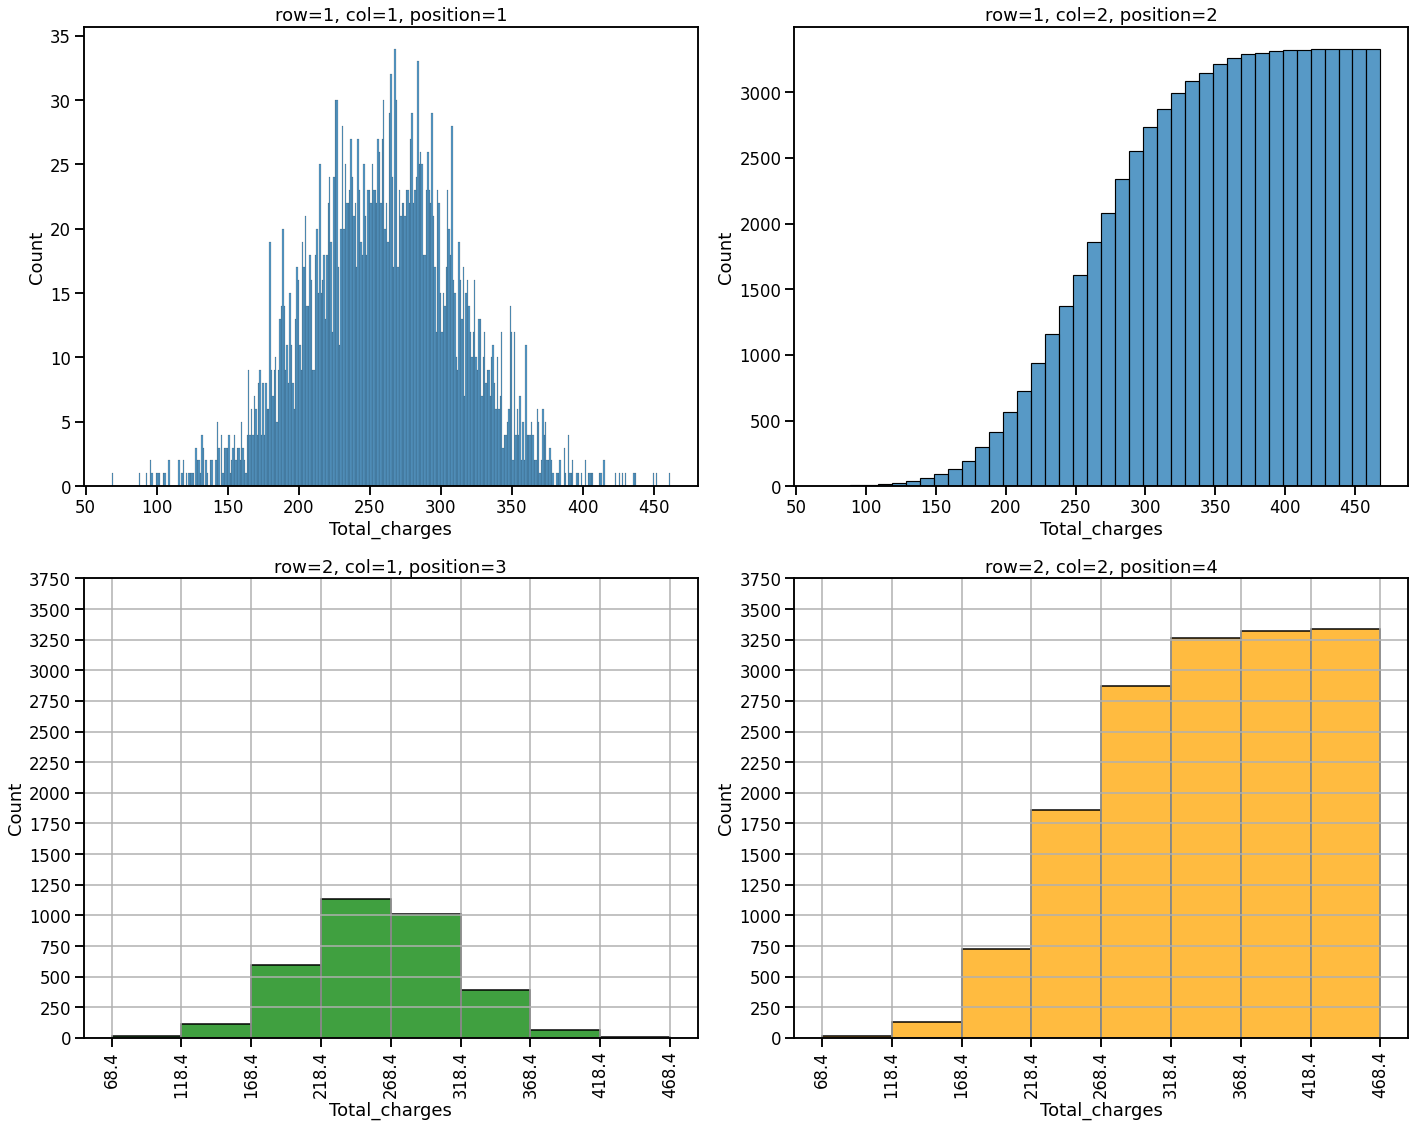

In [14]:
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
sns.histplot(x="Total_charges", data=df, binwidth=1)
plt.title("row=1, col=1, position=1")

plt.subplot(2,2,2)
sns.histplot(x="Total_charges", data=df, binwidth=10, cumulative=True)
plt.title("row=1, col=2, position=2")

plt.subplot(2,2,3)
sns.histplot(x="Total_charges", data=df, binwidth=50, color="green")
plt.xticks(np.arange(df["Total_charges"].min(), df["Total_charges"].max()+51, 50), rotation=90)
plt.grid()
plt.yticks(np.arange(0,4000,250))
plt.title("row=2, col=1, position=3")

plt.subplot(2,2,4)
sns.histplot(x="Total_charges", data=df, binwidth=50, cumulative=True, color="orange")
plt.yticks(np.arange(0,4000,250))
plt.xticks(np.arange(df["Total_charges"].min(), df["Total_charges"].max()+51, 50), rotation=90)
plt.grid()
plt.title("row=2, col=2, position=4")

plt.tight_layout()
plt.show()

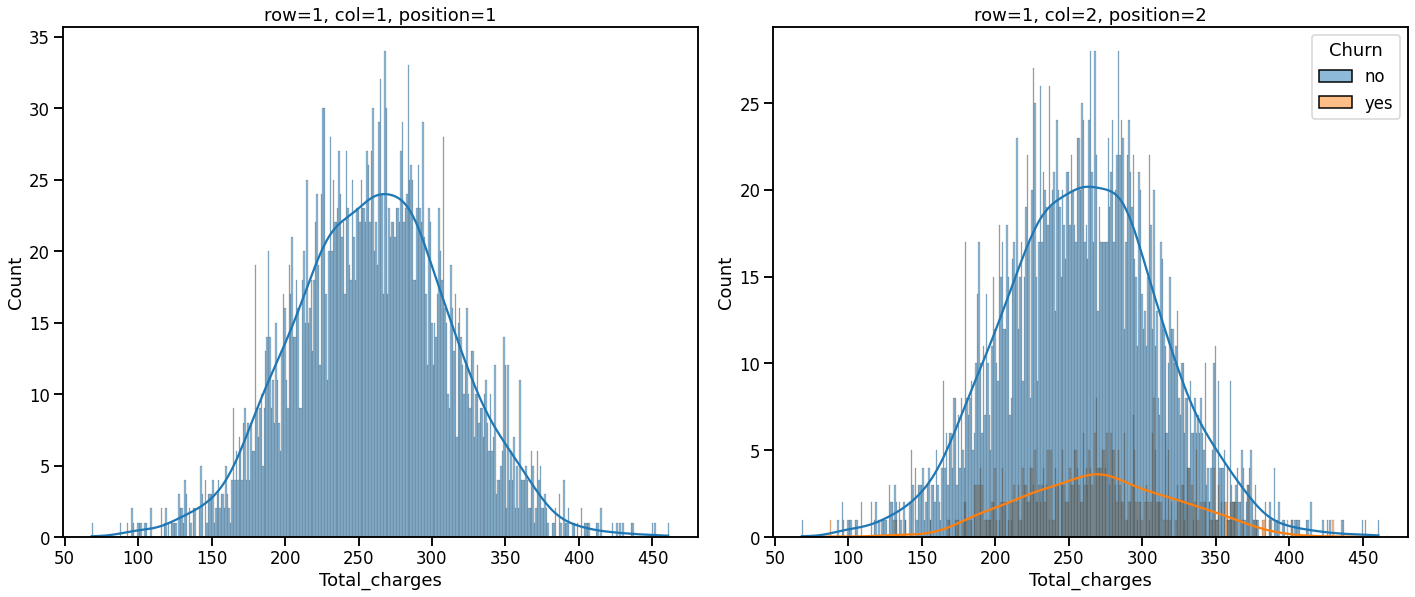

In [19]:
plt.figure(figsize=(20,16))

plt.subplot(2,2,1)
sns.histplot(x="Total_charges", data=df, binwidth=1, kde=True)
plt.title("row=1, col=1, position=1")

plt.subplot(2,2,2)
sns.histplot(x="Total_charges", data=df, binwidth=1, kde=True, hue="Churn")
plt.title("row=1, col=2, position=2")

plt.tight_layout()
plt.show()

In [20]:
df = df.sort_values(by="Total_charges")

display(df.head(7))

,Account_Length,Vmail_Message,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Total_mins,Total_calls,Total_charges
1260,76,22,3,no,no,yes,361.5,349,68.37
3247,146,0,4,yes,no,no,348.6,308,87.62
2756,123,0,2,no,no,no,356.3,295,92.59
883,42,0,1,no,no,no,455.2,326,95.81
3024,101,0,1,no,no,no,383.0,252,95.94
992,45,26,1,no,no,yes,313.3,331,96.62
2350,176,0,0,no,no,no,347.7,338,99.92


In [21]:
print(df["Total_charges"].values[1666])

260.55999999999995


In [22]:
percentile_25th = (df["Total_charges"].values[832]+df["Total_charges"].values[833])/2
print(percentile_25th)

224.145
